In [29]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")

In [30]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [31]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))



In [4]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [32]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps






phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [6]:
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

#ps_Am_Pl_c =subset_samples(ps_paired, Combo=="Ambient_Placebo")
#ps_Am_Pl_c

#ps_Am_Pa_c =subset_samples(ps_paired, Combo=="Ambient_Pathogen")
#ps_Am_Pa_c

#ps_NH_Pl_c =subset_samples(ps_paired, Combo=="NH4_Placebo")
#ps_NH_Pl_c

#ps_NH_Pa_c =subset_samples(ps_paired, Combo=="NH4_Pathogen")
#ps_NH_Pa_c

#ps_placebo =subset_samples(ps_paired, Diseased=="Placebo")
#ps_placebo

#ps_placebo_un =subset_samples(ps_Clipped, Diseased=="Placebo")
#ps_placebo_un

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 106 samples ]
sample_data() Sample Data:       [ 106 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [16]:
                         

ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_clip
                           
                                                                                     
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 5) > (0.10*length(x)), TRUE)
ps_fill_pair  
                           
                                       
                             


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 94 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 94 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 94 tips and 75 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 117 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 117 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 117 tips and 96 internal nodes ]

In [17]:
sample_data(ps_fill_pair) %>%
  group_by(Combo, Health) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.


Combo,Health,Paired
<chr>,<chr>,<int>
Ambient_Pathogen,AH,3
Ambient_Pathogen,DL,23
Ambient_Placebo,AH,36
NH4_Pathogen,AH,2
NH4_Pathogen,DL,30
NH4_Placebo,AH,36
NH4_Placebo,DL,5


In [18]:
sample_data(ps_fill_pair) %>%
  group_by(Combo, Outcome) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.


Combo,Outcome,Paired
<chr>,<chr>,<int>
Ambient_Pathogen,Unaffected,3
Ambient_Pathogen,Unhealthy,23
Ambient_Placebo,Healthy,36
NH4_Pathogen,Unaffected,2
NH4_Pathogen,Unhealthy,30
NH4_Placebo,Healthy,36
NH4_Placebo,Unhealthy,5


# DL vs AH

In [19]:
out = ancombc(phyloseq = ps_fill_pair , formula = "Health", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Health", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, HealthDL, HealthDLSD)%>%
  mutate(group = ifelse(HealthDL > 0, "DL", "AH"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(HealthDL)  %>%
filter(HealthDL=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=HealthDL)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps_DLPL=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps_DLPL=subset_samples(ps_DLPL, !ID %in% dups & Genotype!="U41")
ps_DLPL



ps_ancom_APa = subset_samples(ps_DLPL,
                      Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,HealthDL
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0
2,a14b7162edeb7a30ddb2a46656539857,0
3,7dfdf546ed4b1ca29ad5fbc0fc732338,0
4,544e3f697c0460869c81cc5c7e774c6a,0
5,94580582244d0d8eedb558e2a90c33fa,0
6,ef6c1ba3806541ebf351ab0fcb95fb75,0


[1] 117   2

,taxon_id,HealthDLSD
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0
2,a14b7162edeb7a30ddb2a46656539857,0
3,7dfdf546ed4b1ca29ad5fbc0fc732338,0
4,544e3f697c0460869c81cc5c7e774c6a,0
5,94580582244d0d8eedb558e2a90c33fa,0
6,ef6c1ba3806541ebf351ab0fcb95fb75,0


,taxon_id,Sig
,<chr>,<lgl>
1,ce80d12fb367ffe011c2fb15bf9659bc,TRUE
2,58a75ecc587c36de8b4bbbac0c6efff2,TRUE
3,761f540ee829313961a42bdce8e5f36e,TRUE
4,13d2261e19adef516069e6d4fb5cbbd8,TRUE
5,ac6820155a85d9cc15f8f62406e10e42,TRUE
6,a3c29bcb6997cfe572a474e58291af1d,TRUE


Joining, by = "taxon_id"


[1] 56  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 56 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 56 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 56 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 56 taxa by 13 taxonomic ranks ]

In [20]:
get_ASVs = res_ancom%>%
as.data.frame() %>%
filter(grepl("o__Vibrionales|o__Alteromonadales", Order)) 
dim(as.data.frame(get_ASVs$ASVs))
get_ASVs$ASVs

[1] 27  1

[1] "ASV_8740" "ASV_3091" "ASV_881"  "ASV_9604" "ASV_6352" "ASV_2458"
 [7] "ASV_2266" "ASV_7422" "ASV_7420" "ASV_8040" "ASV_5082" "ASV_754" 
[13] "ASV_5306" "ASV_8137" "ASV_3938" "ASV_1539" "ASV_9702" "ASV_1840"
[19] "ASV_3723" "ASV_919"  "ASV_7518" "ASV_2140" "ASV_2224" "ASV_1134"
[25] "ASV_3198" "ASV_1872" "ASV_6799"

Warning message:
“Removed 448 rows containing missing values (position_stack).”
Warning message:
“Removed 242 rows containing missing values (geom_bar).”


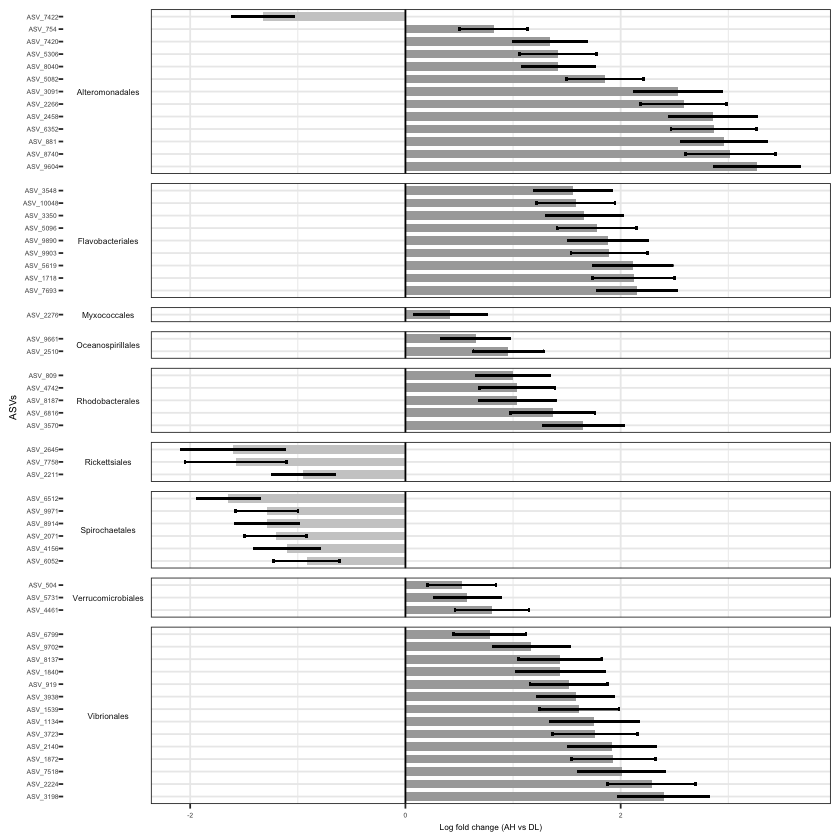

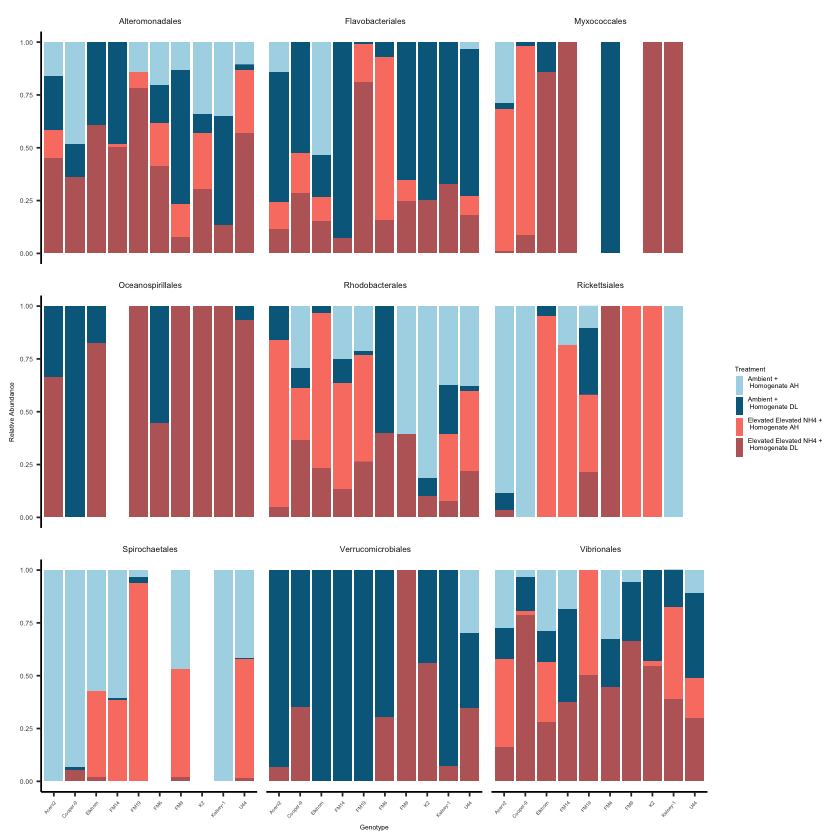

In [21]:
library(dplyr)

F1 = psr_fill_melt %>%

#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
#filter(HealthDL > 1 )  %>%
#filter(HealthDL > 1 | HealthDL <= -1)  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "") %>%
ggplot(
           aes(x = HealthDL, y = reorder(ASVs, -HealthDL),
               fill =group)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(HealthDL) - as.numeric(HealthDLSD), 
xmax = as.numeric(HealthDL) + as.numeric(HealthDLSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = "ASVs", x = "Log fold change (AH vs DL)") + 
  theme_bw() + 
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.90, ncol=1))  +
theme(axis.text.y = element_blank()) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c( 
                        "gray80", "darkgray")) +

theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 6)) +
#theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
#theme(axis.text.y=element_blank()) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, nrow=1)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme(legend.text =element_text(size=6)) +
theme(legend.title = element_text(size=6)) +
facet_grid(Order~., space ="free", scales="free", switch="y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_text(size = 5)) +
geom_vline(xintercept = 0,  
                color = "black", size=.5)  +
theme(legend.position = "none")



F1

psr_fill_melt$Combo = factor(psr_fill_melt$Combo, levels = c("Ambient_Placebo", "NH4_Placebo", 
                                                             "Ambient_Pathogen", "NH4_Pathogen"))


F2 = psr_fill_melt %>%
as.data.frame %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "") %>%

mutate_all(funs(str_replace_all(.,"Placebo", "Homogenate AH"))) %>% 
mutate_all(funs(str_replace_all(.,"Pathogen", "Homogenate DL"))) %>% 
mutate_all(funs(str_replace_all(.,"NH4_Homogenate DL", "Elevated NH4 +\n Homogenate DL\n ")))  %>% 
mutate_all(funs(str_replace_all(.,"NH4_Homogenate AH", "Elevated NH4 +\n Homogenate AH\n")))  %>% 
mutate_all(funs(str_replace_all(.,"Ambient_Homogenate DL", "Ambient +\n Homogenate DL\n"))) %>% 
mutate_all(funs(str_replace_all(.,"Ambient_Homogenate AH", "Ambient +\n Homogenate AH\n"))) %>% 
mutate_all(funs(str_replace_all(.,"NH4", "Elevated NH4"))) %>% 
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(HealthDL) %>%
#filter(HealthDL > 1 | HealthDL <= -1)  %>%
filter(Severity != "NA")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "NH4_Homogenate",
                replacement = "Elevated NH4 +\n Homogenate") %>%


ggplot(
       aes(x=Genotype, y= Abundance, fill=Combo)) +
geom_bar(stat = "identity",position="fill") +
theme_classic() +
scale_fill_manual(values=c( 
                         
                        
                          "lightblue", "#00688B", "salmon", "#bc6767",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1")) +


theme(strip.background = element_rect(fill="white")) +
guides(fill = guide_legend(keywidth = 0.4, keyheight =.70, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
#facet_grid(Order~., space ="free", scales="free", switch = "y") +
facet_wrap(Order~.) +
theme(strip.background = element_blank()) +
 labs(fill = "Treatment") +
theme(axis.title.x = element_text(size = 4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
#theme(legend.position="top") +
theme(axis.title.y = element_text(size=4)) +
theme(axis.text.y = element_text(size=4)) +

theme(axis.text.x = element_text(angle = 50, hjust = 1, size=3)) +
theme(strip.text.x = element_text(size = 5)) +
ylab("Relative Abundance") +
xlab("Genotype") 

F2

Warning message:
“Removed 564 rows containing missing values (geom_bar).”


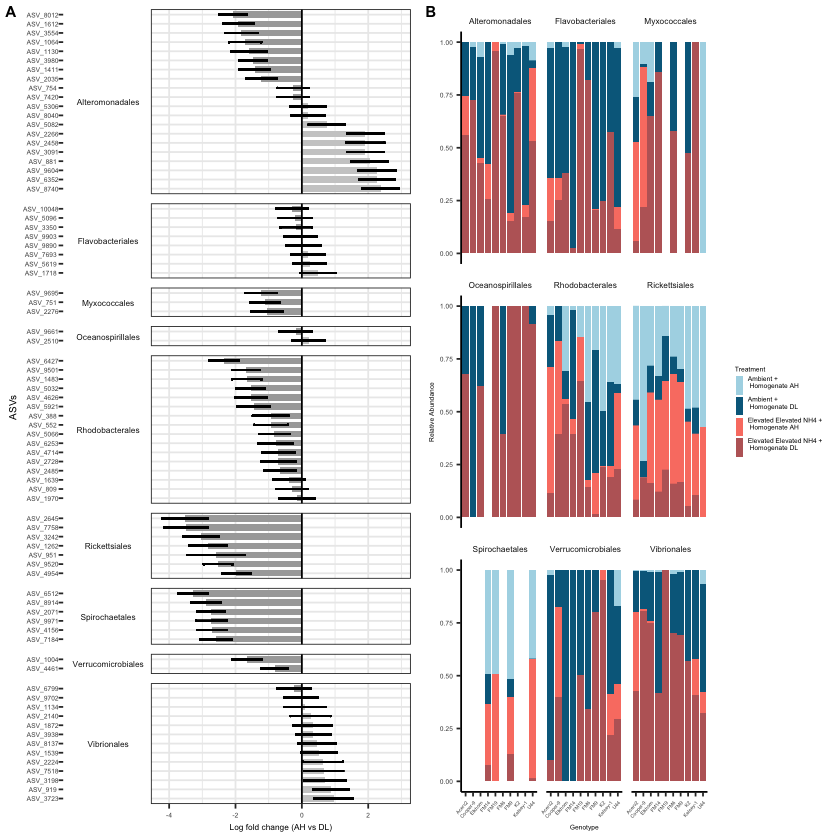

In [195]:
 ggpubr::ggarrange(F1, F2,
                  common.legend = FALSE,
                labels = c("A", "B"), font.label = list(size = 9))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/ANCOM_lesion.jpg", 
      width = 7, height = 6, units = "in", dpi=300)

In [22]:
am_ah_DL=c("NH4_Pathogen_DL", "NH4_Placebo_AH")
ps_fill_pair_DLAH= subset_samples(ps_fill_pair, Combo_health %in% am_ah_DL )
ps_fill_pair_DLAH

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 117 taxa and 66 samples ]
sample_data() Sample Data:       [ 66 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 117 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 117 tips and 96 internal nodes ]

In [23]:
out = ancombc(phyloseq = ps_fill_pair_DLAH , formula = "Health", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Health", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, HealthDL, HealthDLSD)%>%
  mutate(group = ifelse(HealthDL > 0, "AH", "DL"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(HealthDL)  %>%
filter(HealthDL=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=HealthDL)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps_DLNH=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps_DLNH=subset_samples(ps_DLNH, !ID %in% dups & Genotype!="U41")
ps_DLNH



ps_ancom_APa = subset_samples(ps_DLNH,
                      Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    




Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,HealthDL
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,-1.661220
2,a14b7162edeb7a30ddb2a46656539857,-2.337931
3,7dfdf546ed4b1ca29ad5fbc0fc732338,-1.540106
4,544e3f697c0460869c81cc5c7e774c6a,0.000000
5,94580582244d0d8eedb558e2a90c33fa,-1.457049
6,ef6c1ba3806541ebf351ab0fcb95fb75,-1.686026


[1] 109   2

,taxon_id,HealthDLSD
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0.4406026
2,a14b7162edeb7a30ddb2a46656539857,0.4386244
3,7dfdf546ed4b1ca29ad5fbc0fc732338,0.4232522
4,544e3f697c0460869c81cc5c7e774c6a,0.0000000
5,94580582244d0d8eedb558e2a90c33fa,0.4818715
6,ef6c1ba3806541ebf351ab0fcb95fb75,0.4070411


,taxon_id,Sig
,<chr>,<lgl>
1,2549b8aa248e7607235d17caa2578426,TRUE
2,a14b7162edeb7a30ddb2a46656539857,TRUE
3,7dfdf546ed4b1ca29ad5fbc0fc732338,TRUE
4,94580582244d0d8eedb558e2a90c33fa,TRUE
5,ef6c1ba3806541ebf351ab0fcb95fb75,TRUE
6,28fe0a00a6f5e062fba134618cc458e1,TRUE


Joining, by = "taxon_id"


[1] 77  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 77 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 77 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 77 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 77 taxa by 13 taxonomic ranks ]

In [24]:
am_ah_DL=c("NH4_Pathogen_DL", "Ambient_Pathogen_DL")
ps_fill_pair_DL= subset_samples(ps_fill_pair, Combo_health %in% am_ah_DL )

ps_fill_pair_DL

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 117 taxa and 53 samples ]
sample_data() Sample Data:       [ 53 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 117 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 117 tips and 96 internal nodes ]

In [25]:
out = ancombc(phyloseq = ps_fill_pair_DL, formula = "Nutrients", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Nutrients", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = TRUE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, NutrientsNH4, NutrientsNH4SD)%>%
  mutate(group = ifelse(NutrientsNH4 > 0, "Ambient", "NH4"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(NutrientsNH4)  %>%
filter(NutrientsNH4=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=NutrientsNH4)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps_DLNH=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps_DLNH=subset_samples(ps_DLNH, !ID %in% dups & Genotype!="U41")
ps_DLNH



ps_ancom_APa = subset_samples(ps_DLNH,
                      Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    




Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,NutrientsNH4
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0.000000
2,a14b7162edeb7a30ddb2a46656539857,-1.581138
3,7dfdf546ed4b1ca29ad5fbc0fc732338,0.000000
4,544e3f697c0460869c81cc5c7e774c6a,0.000000
5,94580582244d0d8eedb558e2a90c33fa,0.000000
6,ef6c1ba3806541ebf351ab0fcb95fb75,0.000000


[1] 103   2

,taxon_id,NutrientsNH4SD
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0.0000000
2,a14b7162edeb7a30ddb2a46656539857,0.5964285
3,7dfdf546ed4b1ca29ad5fbc0fc732338,0.0000000
4,544e3f697c0460869c81cc5c7e774c6a,0.0000000
5,94580582244d0d8eedb558e2a90c33fa,0.0000000
6,ef6c1ba3806541ebf351ab0fcb95fb75,0.0000000


,taxon_id,Sig
,<chr>,<lgl>
1,a14b7162edeb7a30ddb2a46656539857,TRUE
2,75988391e4aca54b88d7669fabb11b96,TRUE
3,128b9e56c2fa2a8cd24c5e260d0f8335,TRUE
4,195b8f342c7210057ede35892f31931c,TRUE
5,334703646ff79a63f22d692789a7ff0e,TRUE
6,2199ba36a465deebc04fc9cff6ae0559,TRUE


Joining, by = "taxon_id"


[1] 14  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 14 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 14 taxa by 13 taxonomic ranks ]